# Assignment 6: API Analysis

This notebook is for analyzing the data you have gathered from your API. See Moodle for the requirements. This notebook must assume that your API Gather notebook has saved data gathered into an appropriate format to be read into this notebook for analysis. In almost all cases, this notebook should use pandas. If you think you have data that cannot be analyzed in that way, please get in touch with the instructor well before the deadline to discuss if another approach is acceptable.

You are responsible for creating all markdown and code cells as needed in this assignment so that your purpose, analysis, and interpretation of results are clear.

## Import modules for data manipulation and analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read saved csv file (st_species.csv) into a pandas DataFrame


In [13]:
file_path = "/home/mkmueller/cs703f24/Assignment6/st_species.csv"

df = pd.read_csv(file_path)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   uid                      759 non-null    object
 1   name                     759 non-null    object
 2   homeworld                286 non-null    object
 3   quadrant                 288 non-null    object
 4   extinctSpecies           759 non-null    bool  
 5   warpCapableSpecies       759 non-null    bool  
 6   extraGalacticSpecies     759 non-null    bool  
 7   humanoidSpecies          759 non-null    bool  
 8   reptilianSpecies         759 non-null    bool  
 9   nonCorporealSpecies      759 non-null    bool  
 10  shapeshiftingSpecies     759 non-null    bool  
 11  spaceborneSpecies        759 non-null    bool  
 12  telepathicSpecies        759 non-null    bool  
 13  transDimensionalSpecies  759 non-null    bool  
 14  unnamedSpecies           759 non-null    b

## Analysis of the different classes of species 

- Make a new dataframe containing only the classes of species
- Typecast the boolean values to integers
- Sum up the boolean columns

In [14]:
cols = ["extinctSpecies","warpCapableSpecies", "extraGalacticSpecies", "humanoidSpecies", "reptilianSpecies", "nonCorporealSpecies", "shapeshiftingSpecies", "spaceborneSpecies", "telepathicSpecies", "transDimensionalSpecies", "unnamedSpecies"]
df_sp_classes = df[cols] 
#typecast boolean as int
df_sp_classes = df_sp_classes.astype(int) 
print(df_sp_classes.head(11))
# summing up the boolean columns
df_sp_classes_sum = df_sp_classes.sum()
print(df_sp_classes_sum)

    extinctSpecies  warpCapableSpecies  extraGalacticSpecies  humanoidSpecies  \
0                0                   0                     0                1   
1                0                   0                     0                1   
2                0                   0                     0                1   
3                0                   0                     0                1   
4                0                   0                     0                1   
5                0                   0                     0                0   
6                0                   1                     0                1   
7                0                   0                     0                1   
8                0                   0                     0                1   
9                0                   0                     0                0   
10               0                   0                     0                1   

    reptilianSpecies  nonCo

In [15]:
#make new dataframe with index as first column 
df_sum = df_sp_classes_sum.reset_index() 
# name the new columns 
df_sum.columns = ['Class', 'Count']
print(df_sum)

                      Class  Count
0            extinctSpecies      3
1        warpCapableSpecies    100
2      extraGalacticSpecies      9
3           humanoidSpecies    490
4          reptilianSpecies      8
5       nonCorporealSpecies     31
6      shapeshiftingSpecies     23
7         spaceborneSpecies     15
8         telepathicSpecies     38
9   transDimensionalSpecies      0
10           unnamedSpecies    147


### Visualize the different classes of species:

- Make a barplot to visualize frequency of each class of species

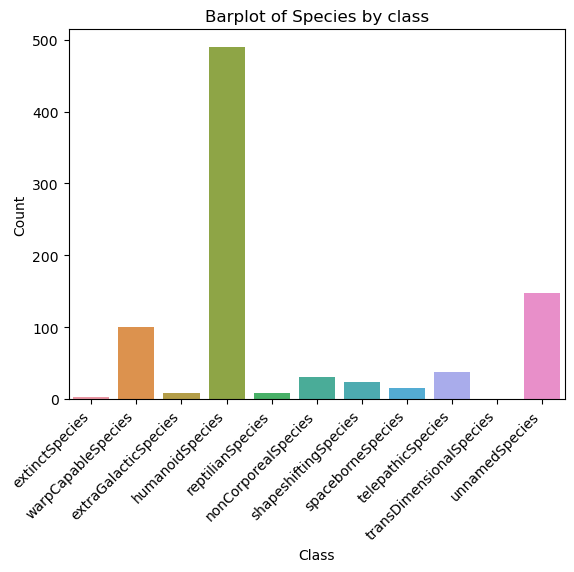

In [16]:
sns.barplot(data=df_sum, x="Class", y="Count")
plt.xticks(rotation=45, ha = "right") 
plt.title("Barplot of Species by class")
plt.show()

#### Filter warpCapableSpecies:

- Count the proportion of humanoid species in the warpCapableSpecies class

- Visualize the result in a pie chart


0.89
99.11


Text(0.5, 1.0, 'Proportion of Humanoid Species among WarpCapableSpecies')

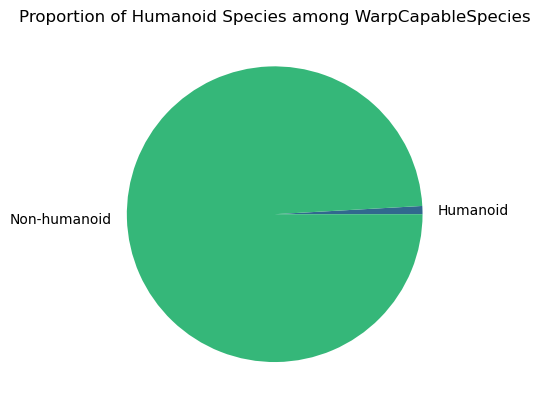

In [17]:
warp_capable_species = df[df['warpCapableSpecies']]
humanoid_warp = warp_capable_species['humanoidSpecies'].sum()
total_warp_capable = len(warp_capable_species) 
proportion_humanoid_warp = humanoid_warp / total_warp_capable
proportion_non_humanoid_warp = (total_warp_capable - humanoid_warp / total_warp_capable)
print(proportion_humanoid_warp)
print(proportion_non_humanoid_warp)

labels=["Humanoid", "Non-humanoid"]
plt.pie([proportion_humanoid_warp, proportion_non_humanoid_warp], labels=labels, colors=sns.color_palette('viridis', len(labels)))
plt.title('Proportion of Humanoid Species among WarpCapableSpecies')
plt.show()

#### Interpretation of Barplot and Pie chart

- humanoid species are the most common species (490 out of 759)

- out of 759 species in the galaxy only about 100 are capable of employing warp drive technology

- since there was no way of telling which classes of species are making up the warpCapableSpecies, filtering by warpCapable and counting the number of humnanoid vs. non-humanoid species provides a clearer picture: 

The proportion of humanoids in the class of species capable of warp drive is less than 1%, although humanoids make up c. 65% of the galactic population. In other words, over 99% of the species that employ warp drive technology are non-humanoid. 

## Analyze population of species:

- Count number of different species living in each quadrant

In [18]:
# Group by quadrant and count species 
species_by_quadrant = df['quadrant'].value_counts().reset_index() 
species_by_quadrant.columns = ['Quadrant', 'Count'] 
print(species_by_quadrant)

         Quadrant  Count
0  Delta Quadrant    162
1  Alpha Quadrant     87
2  Gamma Quadrant     20
3   Beta Quadrant     19


#### Interpretation of the population data:

- Compared to the Alpha Quadrant (home to Earth) almost twice as many different species live in the Delta Quadrant

### Visualize the population in each quadrant 

- bubble plot

- pie chart

<Axes: xlabel='Quadrant', ylabel='Count'>

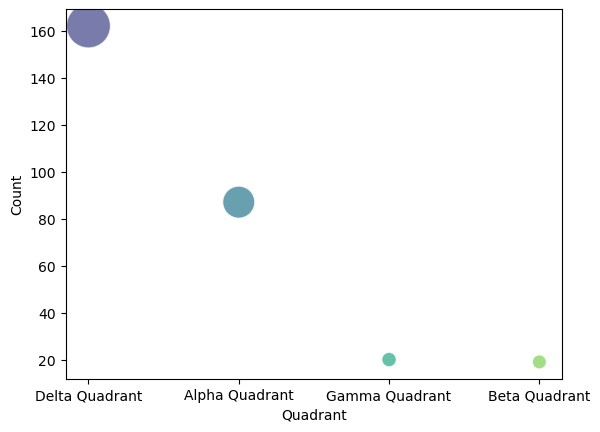

In [19]:
sns.scatterplot(data=species_by_quadrant, x='Quadrant', y='Count', size='Count', sizes=(100, 1000), hue='Quadrant', palette='viridis', legend=False, alpha=0.7)
plt.show()

Text(0.5, 1.0, 'Population of Species in Each Quadrant')

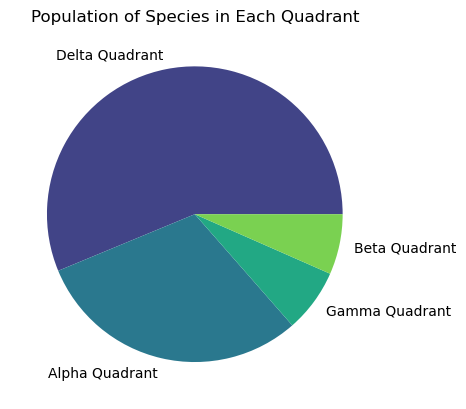

In [20]:
# visualize population with a pie chart
plt.pie(species_by_quadrant['Count'], labels=species_by_quadrant['Quadrant'], colors=sns.color_palette('viridis', len(species_by_quadrant))) 
plt.title('Population of Species in Each Quadrant')
plt.show()

### Analyze the proportion of humanoid species in the Delta Quadrant

- Filter by Delta Quadrant

- Count the number of humanoid species among the total population in the Delta Quadrant

- Visualize the result in a pie chart


In [21]:
#filter Delta Quadrant
delta_quadrant_species = df[df["quadrant"] == "Delta Quadrant"]

total_delta_quadrant_species = len(delta_quadrant_species)
humanoid_delta = delta_quadrant_species["humanoidSpecies"].sum()
non_humanoid_delta = total_delta_quadrant_species - humanoid_delta
print(total_delta_quadrant_species)
print(humanoid_delta)
proportion_humanoid_delta = humanoid_delta / total_delta_quadrant_species
proportion_non_humanoid_delta = (total_delta_quadrant_species - humanoid_delta) / total_delta_quadrant_species
print(proportion_humanoid_delta)
print(proportion_non_humanoid_delta)

162
118
0.7283950617283951
0.2716049382716049


Text(0.5, 1.0, 'Proportion of Humanoid vs. Non-humanoid Population in the Delta Quadrant')

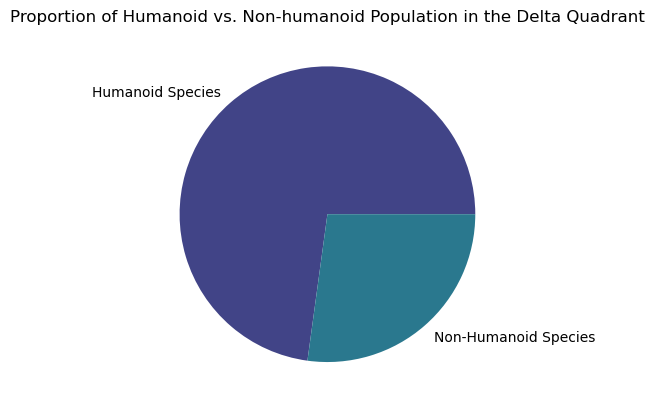

In [22]:
labels = ["Humanoid Species", "Non-Humanoid Species"] 
sizes = [humanoid_delta, non_humanoid_delta] 
plt.pie(sizes, labels=labels, colors=sns.color_palette('viridis', len(species_by_quadrant))) 
plt.title("Proportion of Humanoid vs. Non-humanoid Population in the Delta Quadrant")
plt.show()

#### Interpretation of Proportions and Pie chart

- humanoid species are the most common species in the Delta Quadrant

- c. 73% of the population in the Delta Quadrant are humanoid
- c. 27% of the population in the Delta Quadrant are non-humanoid

(either way, we are not alone :))
